In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv', sep=",", encoding = "ISO-8859-1")

In [4]:
df = data.copy()

In [5]:
df.shape

(49320, 22)

In [26]:
df.head()

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,d30838cf806,6340864010,QUALITY DOCUMENT SOLUTIONS INC,ODESSA,TX,WELLS FARGO BANK NATL ASSOC,SD,22-May-03,2003,10,...,2,10,1,1,0,N,30-Jun-03,"$150,000.00",$0.00,1
1,14560b856a6,1670916004,ATLANTIC INDUSTRIAL WOOD PRODU,KELLER,TX,WELLS FARGO BANK NATL ASSOC,CA,7-Apr-06,2006,1,...,0,1,1,1,Y,N,31-Jul-06,"$250,000.00",$0.00,1
2,051e5c3899f,7568313003,C J TREEHOUSE INC.,EL PASO,TX,BANK OF AMERICA NATL ASSOC,TX,12-Sep-94,1994,5,...,0,0,1,0,N,Y,31-Oct-94,"$53,000.00",$0.00,1
3,eb223b05ea8,4585814005,WINGSTOP,SAN ANTONIO,TX,COMPASS BANK,AL,18-Jun-01,2001,1,...,3,1,89769,1,0,N,31-Aug-01,"$170,000.00",$0.00,1
4,c80c89ac964,2003866003,H & H MACHINE & SUPPLY INC,ODESSA,TX,SOUTHWEST BANK,TX,12-May-06,2006,5,...,0,5,1,1,0,N,31-May-06,"$121,000.00",$0.00,1


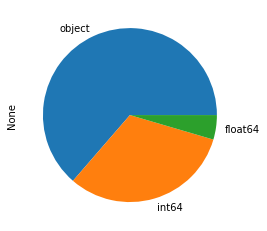

In [6]:
df.dtypes.value_counts().plot.pie()

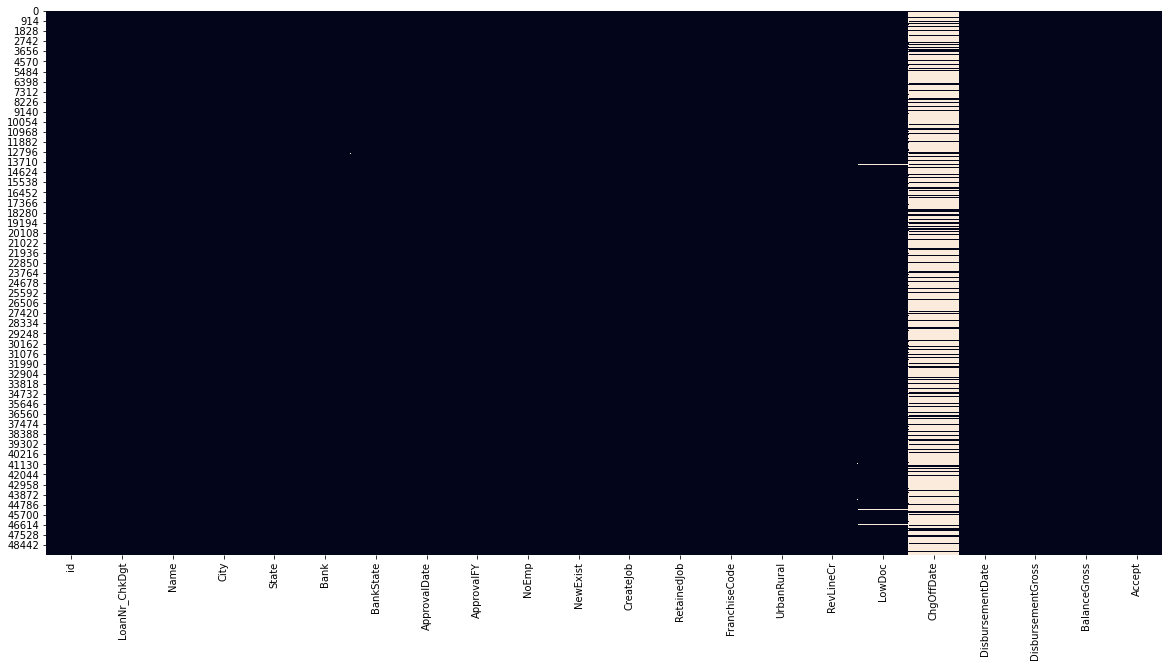

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [8]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

id                   0.000000
DisbursementGross    0.000000
UrbanRural           0.000000
FranchiseCode        0.000000
RetainedJob          0.000000
CreateJob            0.000000
BalanceGross         0.000000
NoEmp                0.000000
Accept               0.000000
ApprovalDate         0.000000
State                0.000000
City                 0.000000
LoanNr_ChkDgt        0.000000
ApprovalFY           0.000000
Name                 0.000020
NewExist             0.000142
DisbursementDate     0.002555
LowDoc               0.003244
BankState            0.004055
Bank                 0.004055
RevLineCr            0.005860
ChgOffDate           0.805941
dtype: float64

In [9]:
df.drop(['ChgOffDate'], axis=1, inplace=True)

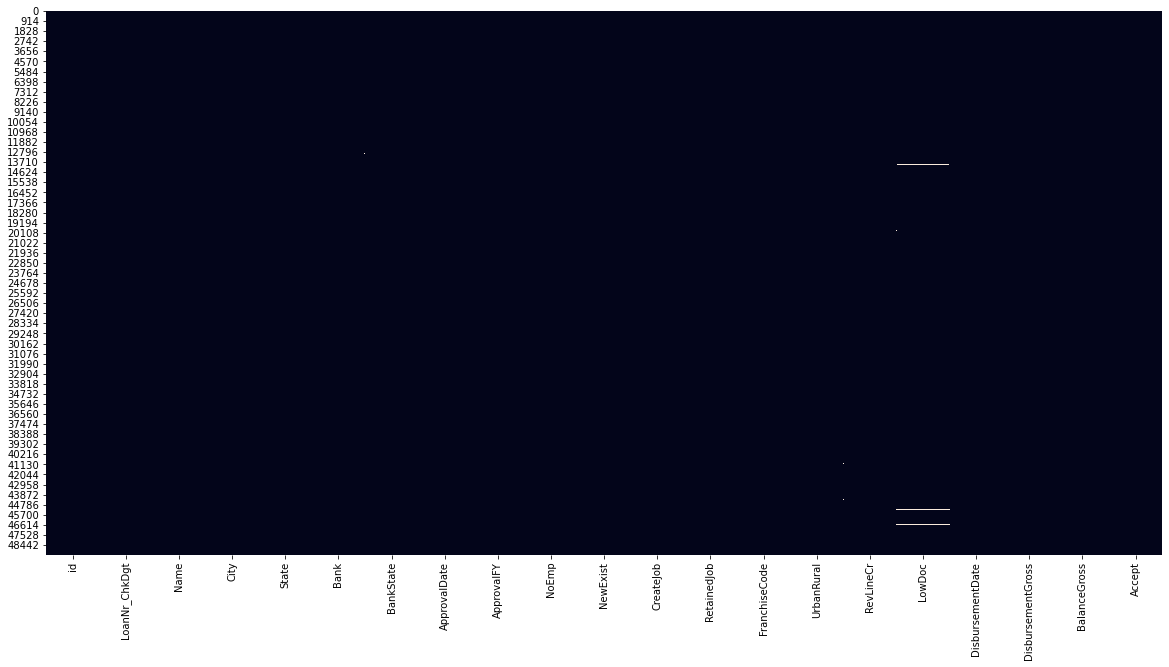

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [11]:
df['Accept'].value_counts(normalize=True)

1    0.810929
0    0.189071
Name: Accept, dtype: float64

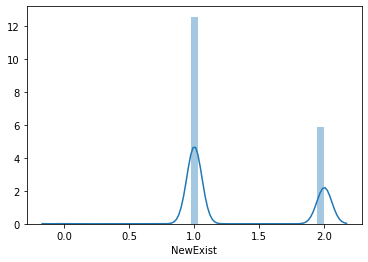

In [12]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

D:\Annaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Annaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


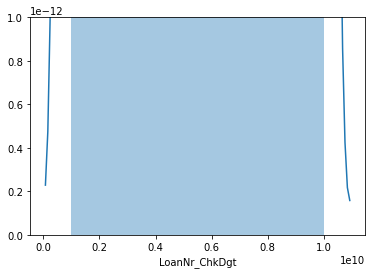

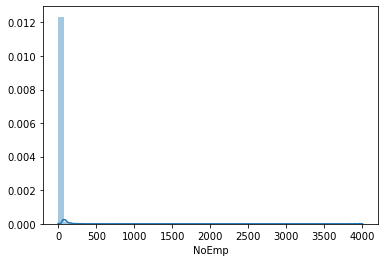

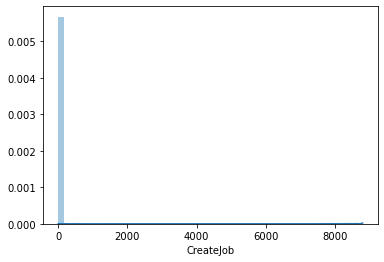

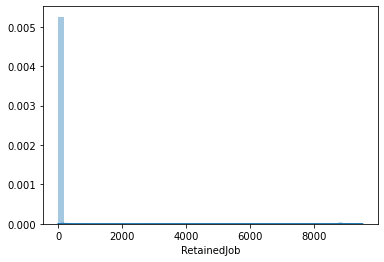

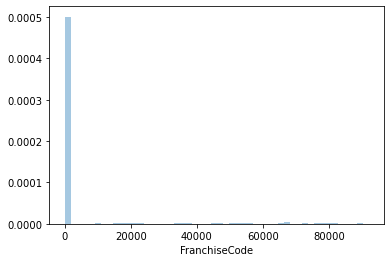

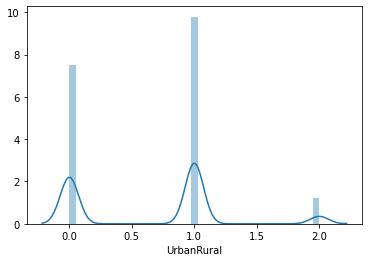

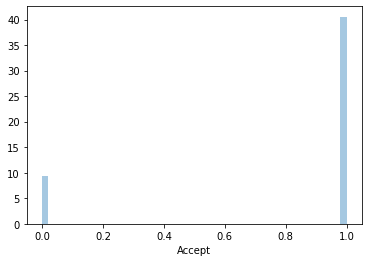

In [13]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

In [14]:
df_categorical = df.select_dtypes('object')

In [15]:
categorical_columns = df_categorical.columns

In [18]:
df_categorical.columns

Index(['id', 'Name', 'City', 'State', 'Bank', 'BankState', 'ApprovalDate',
       'ApprovalFY', 'RevLineCr', 'LowDoc', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross'],
      dtype='object')

In [19]:
sns.countplot(x='City',data=df,hue='Accept',ax=axes[row,col])

In [21]:
df.columns

Index(['id', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Bank', 'BankState',
       'ApprovalDate', 'ApprovalFY', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'Accept'],
      dtype='object')

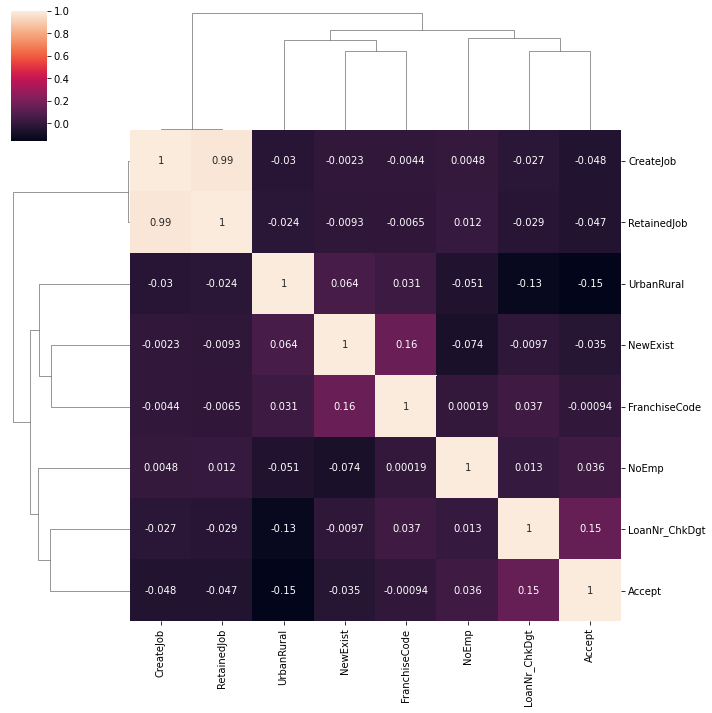

In [29]:
data.corr()
corrMatrix = data.corr()
sns.clustermap(corrMatrix, annot=True)
plt.show()

D:\Annaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Annaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


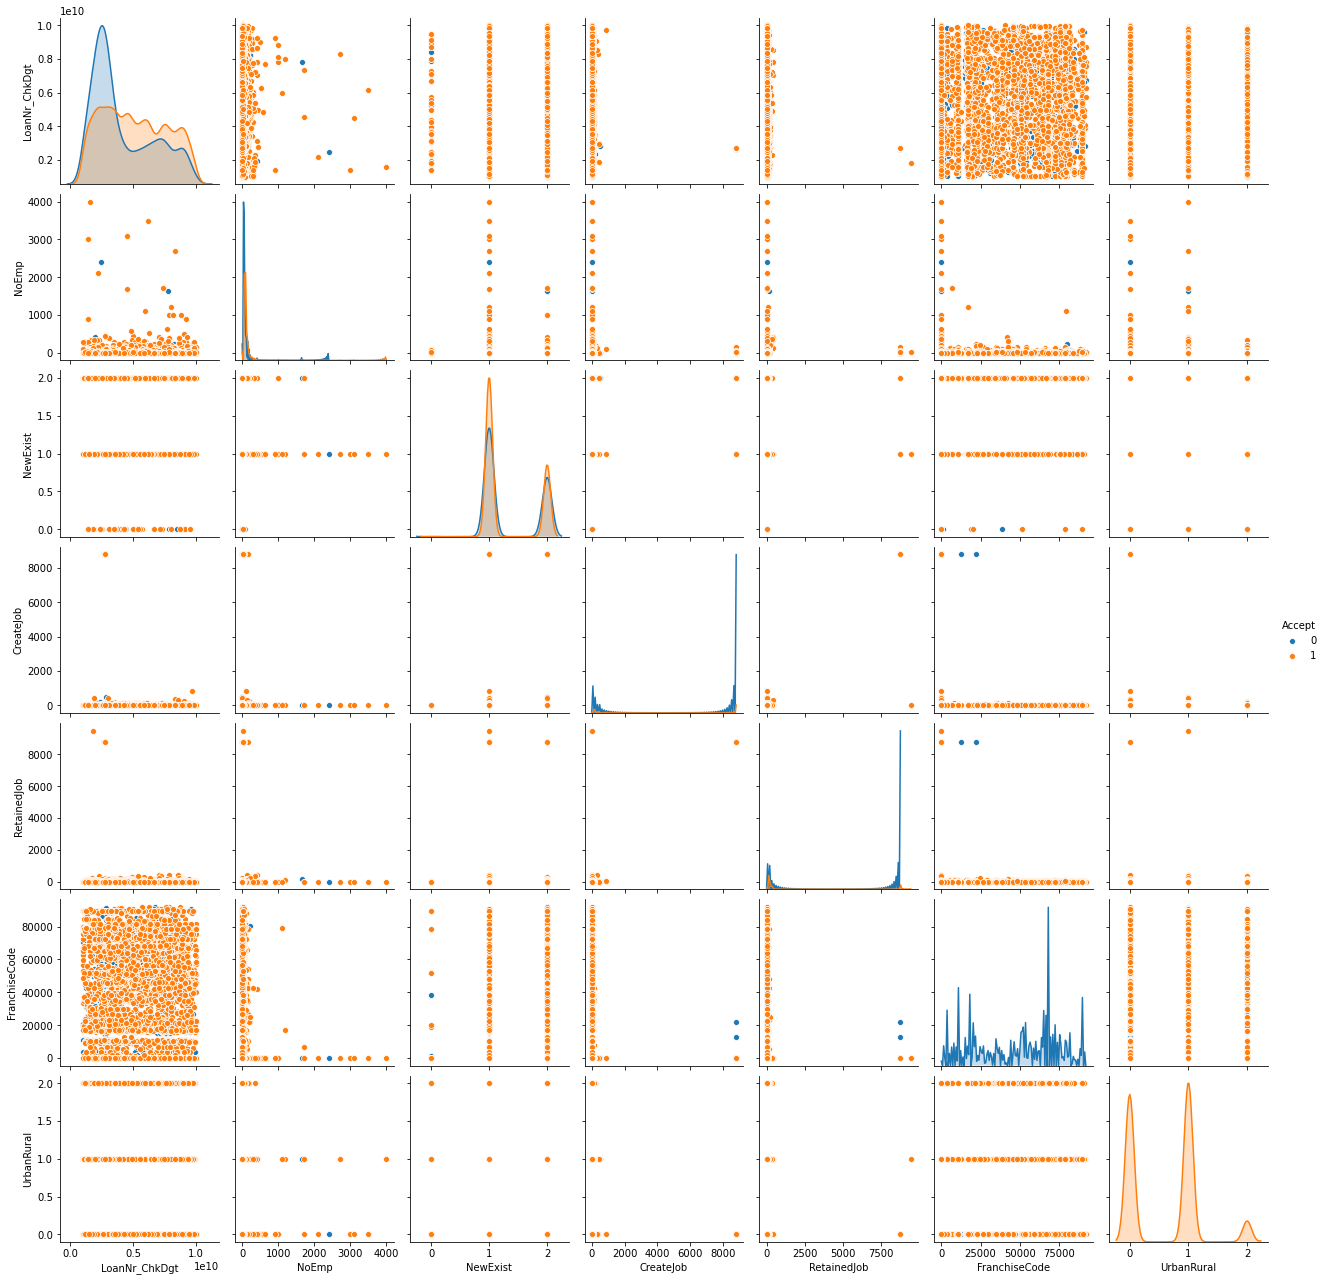

In [30]:
sns.pairplot(df,hue='Accept')

In [31]:
pd.crosstab(df['Bank'], df['Accept'])

Accept,0,1
Bank,,
"1ST BANK, NATIONAL ASSOCIATION",1,0
1ST CHOICE BANK,0,3
1ST COMMERCIAL CAPITAL,4,2
1ST COMMUNITY FCU,0,3
1ST LIB NATL BK,0,1
...,...,...
YELLOWSTONE BANK,1,0
YOAKUM NATIONAL BANK,0,3
ZAPATA NATIONAL BANK,3,1
